# Python applications to visualise 3D subsurface geoscience data

## A Case Study on coalmines dataset from Ruhr coalfield in the lower Rhine basin, Germany.  

***By: Ramy Abdallah***

![Coalmines fields, Germany](https://i.imgur.com/fBupoA1.jpg)
Source of image: https://energytransition.org/2015/12/coal-and-renewables-battle-for-power-in-germany/

## Introduction

Exploration is the process of looking for mineral, coal, oil, or gas resources (petroleum). A coal mine is the basis of a strong study in an exploratory geological phase where there is enough data to define a proven reserve with a high degree of confidence, which involves knowledge of basic parameters such as orebody rock density as well as nearby rocks, lithology, depth, size, orebody shape, and stress fields. The coal mine exploration starts with mining all the coals exposed on the surface and later goes deep through boreholes, shafts, galleries, besides vertical and horizontal wells. This exploration press allows detailed gathering of information about the subsurface to build a subsurface 3D model. Here in this notebook, we will explore how to visualise these 3D models in the Python ecosystem.

The main steps in the coalmines exploration workflow can be summarised in the following image, where the 3D subsurface models generated from these steps can be complex and reflect thrusts, synclines and anticlines structures.

![Thrust Faults Structures](https://i.imgur.com/RgINVuh.png)

## Objective

Our primary objective is to use free Python packages to visualise our 3D subsurface models. Visualizing faults and horizons, as well as all connected vertical and horizontal wells, is one of them. Our automated technique is based on a Python script and may be extended to comparable datasets that need the visualisation of three dimensional subsurface data models.

Example of a 3D subsurface complex model having thrusts, synclines and anticlines structures visualising by Move structure software https://www.petex.com/products/move-suite/.

![Thrust Faults Structures](https://i.imgur.com/K8ofvyr.png)

## Data

All our 3D data models are in CSV files, and the models are built by interpolation from 2D cross-sections.

Before we start our visualisation, let us import all the needed libraries.

## Libraries

In this study we are going to use mainly `matplotlib` and `open3d` libarary.

#### Matplotlib

`Matplotlib` is a Python package that allows you to create static, animated, and interactive visualisations. Matplotlib makes simple things simple and difficult things possible.

For more information see https://matplotlib.org/stable/users/getting_started/

#### Open3D

`Open3D` is an open-source framework that enables the quick development of 3D data-related apps. The `Open3D` frontend offers a collection of carefully chosen data structures and algorithms written in both C++ and Python. The backend has been greatly optimised and is prepared for parallelization. Contributions from the open-source community are welcome.

For more information see http://www.open3d.org/docs/release/introduction.html

Also, we import a few other modules to make our plots looks professional such as `PyQt5`. Please see https://doc.qt.io/qtforpython/

In [1]:
import csv
import sys, os
import numpy as np
import pandas as pd
import open3d as o3d
from PIL import Image
import plotly.offline
import matplotlib as mpl
import plotly.express as px
from PyQt5.QtCore import QUrl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PyQt5.QtWidgets import QApplication
from PyQt5.QtWebEngineWidgets import QWebEngineView
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

%matplotlib inline
plt.style.use('seaborn-white')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


We need to install the open3d library. However, if the library is not installed, uncomment and run the following code.

In [2]:
# Uncomment and run the commands below if imports fail
#!conda install numpy pandas 
#!pip install open3d
#!pip install matplotlib --upgrade --quiet

## Project Generalised Workflow

>1. **Load, read and explore the data**
>2. **Perform data preparation & cleaning**
>3. **3D visualization of the subsurface models**
>4. **Summarize inferences & write a conclusion**

## Methods

### 1. Load, read and explore the data

#### Download Geological Models as CSV files

Let us get started by creating a dataframes, where we read the csv file into it.

In [3]:
data = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\hor_all_model.csv")
data_df = pd.read_csv(r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\3d-model-data-file.csv')
data_2 = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\hor1-6.csv")

C:\Users\r04ra18\AppData\Local\Temp\ipykernel_20436\3938440175.py:3: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



### 2. Data preparation & cleaning

Here we open and read the csv file. Read the columns of x, y & z values of the csv file using numpy. Use your own directory to dataset

In [4]:
if __name__ == "__main__":
    
    data.columns = ["X", "Y", "Z"]
    X = data["X"].to_numpy()
    Y = data["Y"].to_numpy()
    Z = data["Z"].to_numpy()

Then we convert the x, y & z to array using np and check the data.

In [5]:
xyz = np.asarray([X,Y,Z])
xyz_t = np.transpose(xyz)

# check the data
print(xyz_t)

[[ 293.0046  250.      164.3685]
 [ 293.0046  226.1905  164.3685]
 [ 293.0046  202.381   164.3685]
 ...
 [ 698.2952  243.007  -218.181 ]
 [ 698.2952  246.5035 -218.181 ]
 [ 698.2952  250.     -218.181 ]]


Let us create a points cloud with colour and check if the ploy data is correct.

In [6]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz_t)
pcd.colors = o3d.utility.Vector3dVector()

# use your own directory to dataset
o3d.io.write_point_cloud(r"C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\hor_all_model.ply", pcd)

True

### 3. 3D Geological Model Visualisation

In [7]:
# plot 3D model using point cloud - open 3D
# use your own directory to dataset

pcd_2 = o3d.io.read_point_cloud(r"C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\hor_all_model.ply")
o3d.visualization.draw_geometries([pcd_2],window_name="Tunnel", width=700,height=700,left=50,top=50)

The result will be displayed in a separate window. However, we provide an image for the result like the following image.

![Visualisation of Coal layers 3D model](https://i.imgur.com/eZiC02q.png)

#### Another 3D Geological Model Visualisation

Let us explore another model from our dataset.

In [8]:
data_22 = data_2[['x', 'y', 'z']]

In [9]:
if __name__ == "__main__":
    
    data_22.columns = ["X", "Y", "Z"]
    X = data_22["X"].to_numpy()
    Y = data_22["Y"].to_numpy()
    Z = data_22["Z"].to_numpy()

In [10]:
xyz = np.asarray([X,Y,Z])
xyz_t = np.transpose(xyz)

In [11]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz_t)
pcd.colors = o3d.utility.Vector3dVector()

# use your own directory to dataset
o3d.io.write_point_cloud(r"C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\hor1-6.ply", pcd)

True

In [12]:
pcd_2 = o3d.io.read_point_cloud(r"C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\hor1-6.ply")
o3d.visualization.draw_geometries([pcd_2],window_name="Tunnel", width=700,height=700,left=50,top=50)

The result will be displayed in a separate window. However, we provide an image for the result like the following image.

![Visualisation of Coal layers 3D model](https://i.imgur.com/m8JOAIj.png)

#### One more 3D Geological Model Visualisation

Here we try to plot the 3D models using `matplotlib` to visualise the model.

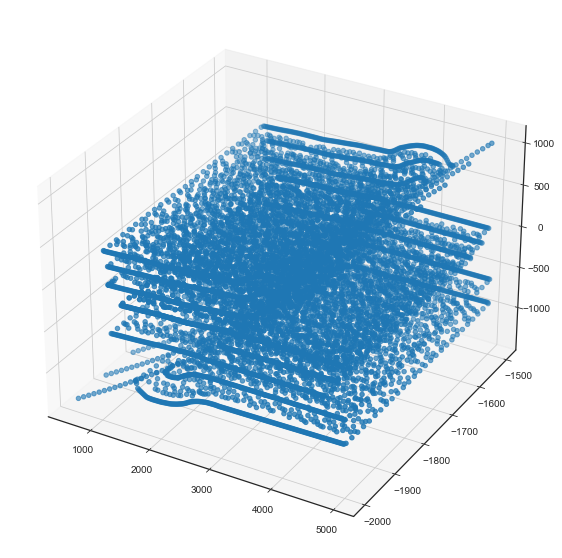

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_df['x'],data_df['y'],data_df['z'],);

The following list containts the colours for `matplotlib`.

In [14]:
color_ls = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
            'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 
            'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 
            'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
            'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
            'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
            'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 
            'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
            'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 
            'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
            'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
            'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
            'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
            'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
            'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 
            'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 
            'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 
            'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 
            'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
            'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

<IPython.core.display.Javascript object>


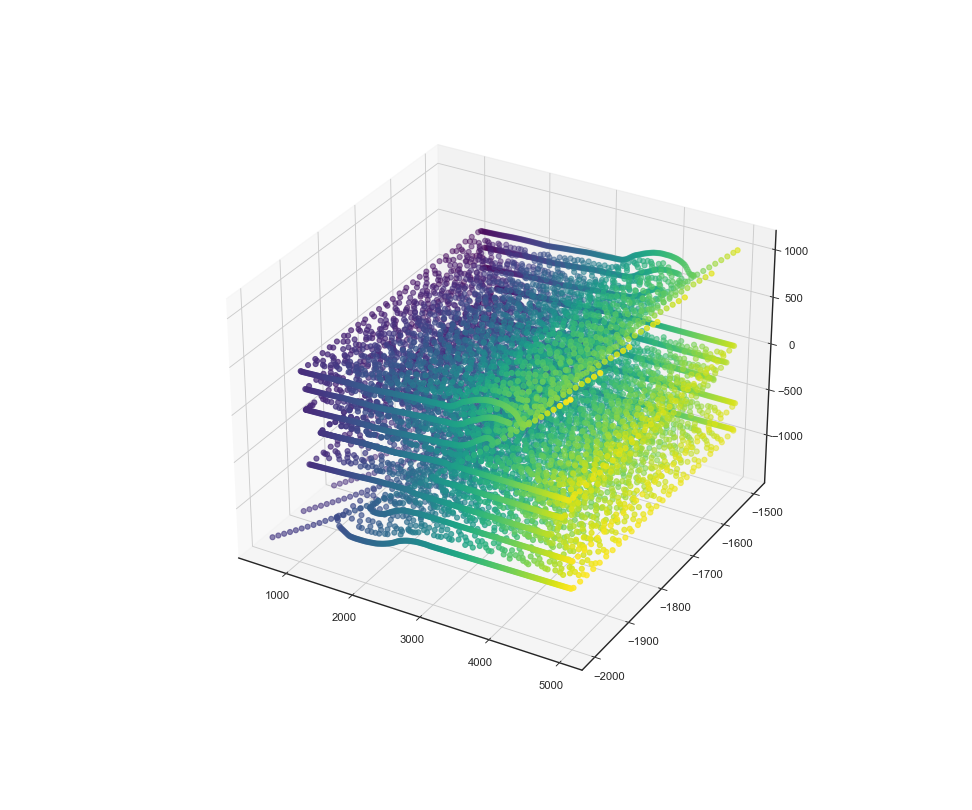

In [19]:
%matplotlib notebook
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_df['x'],data_df['y'],data_df['z'],c=np.linalg.norm([data_df['x'],data_df['y'],data_df['z']], axis=0), cmap="viridis");

<IPython.core.display.Javascript object>


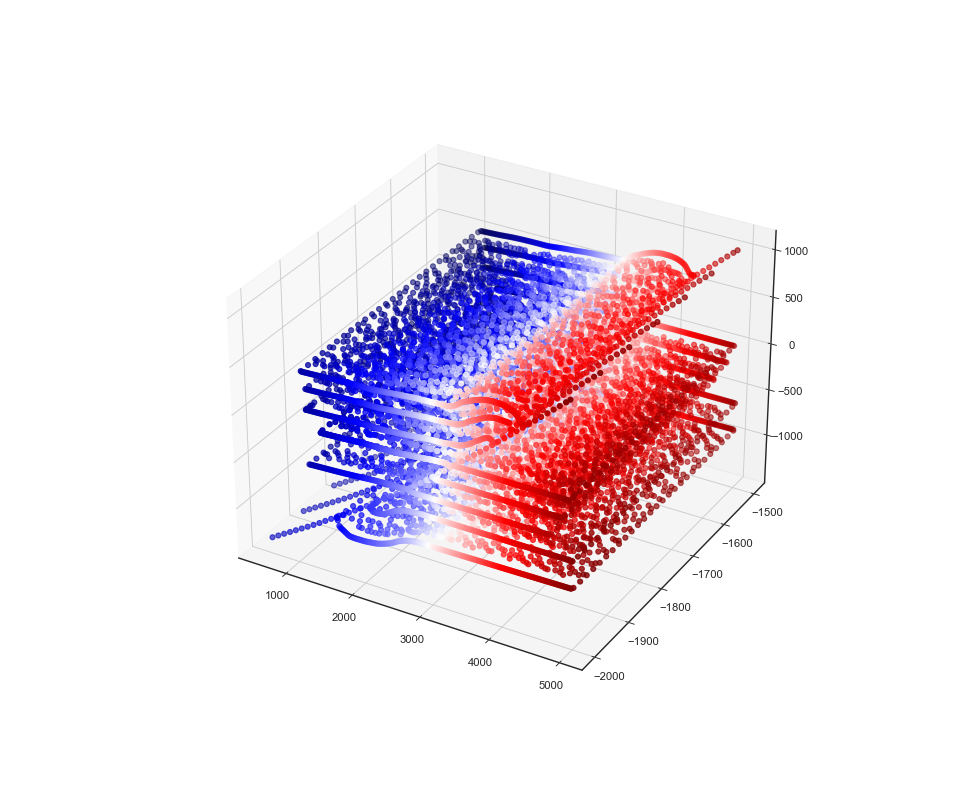

In [20]:
%matplotlib notebook
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_df['x'],data_df['y'],data_df['z'],c=np.linalg.norm([data_df['x'],data_df['y'],data_df['z']], axis=0), cmap="seismic");

<IPython.core.display.Javascript object>


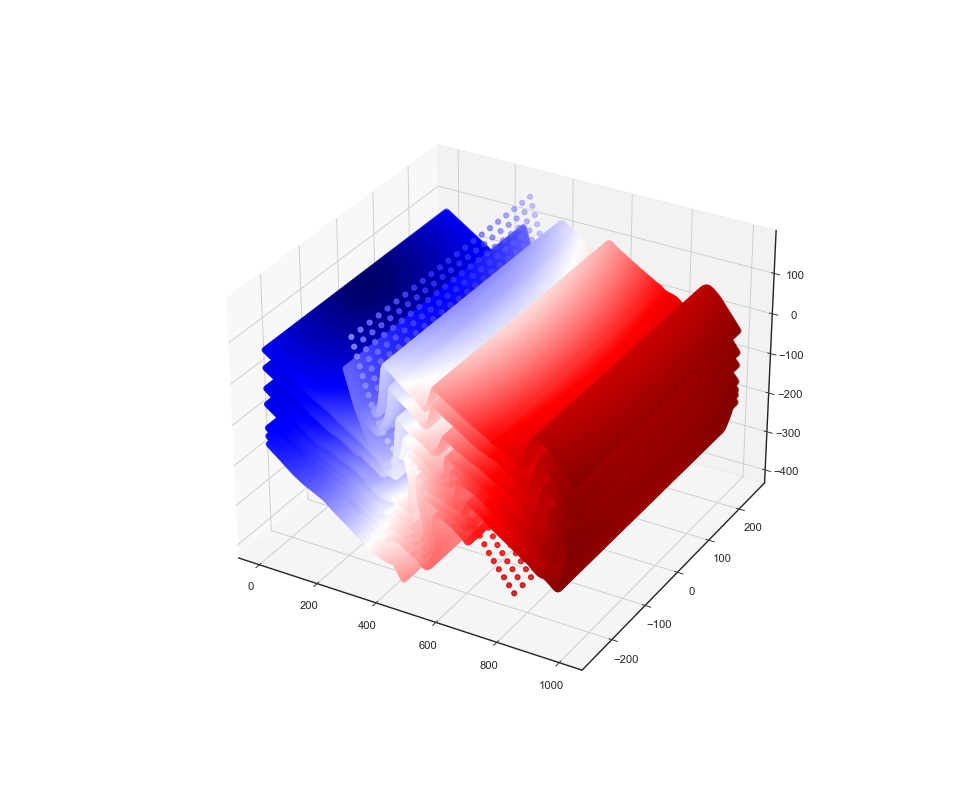

In [21]:
data = pd.read_csv(r"C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\hor_all_model.csv")
%matplotlib notebook
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x'],data['y'],data['z'],c=np.linalg.norm([data['x'],data['y'],data['z']], axis=0), cmap="seismic");

<IPython.core.display.Javascript object>


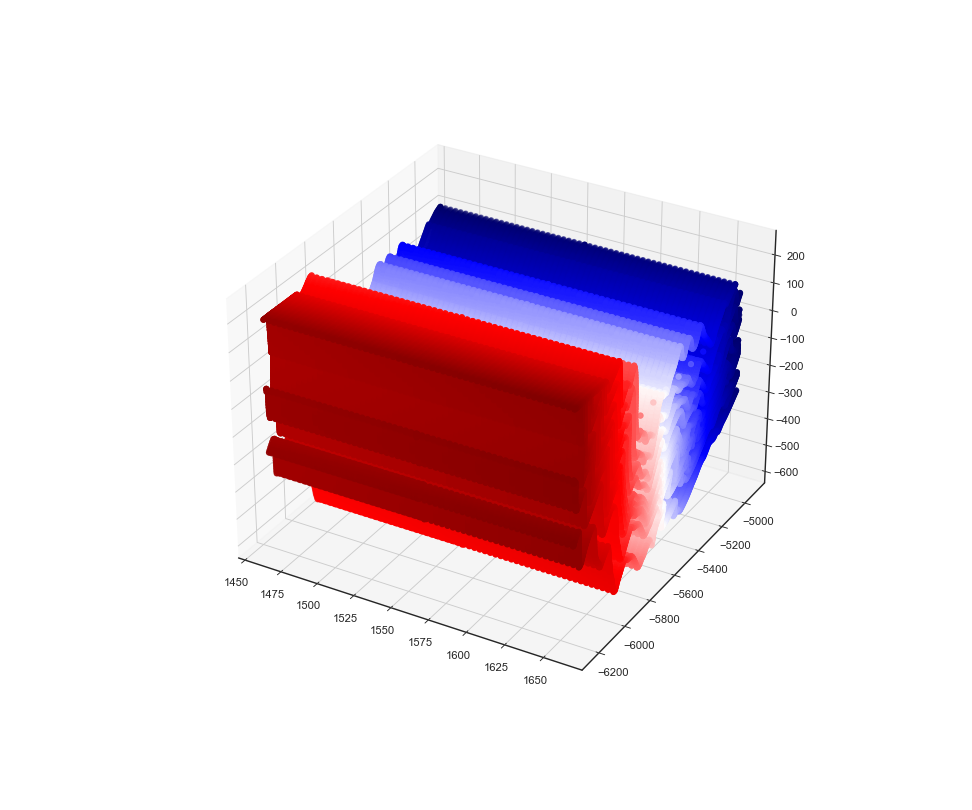

In [18]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_2['x'],data_2['y'],data_2['z'],c=np.linalg.norm([data_2['x'],data_2['y'],data_2['z']], axis=0), cmap="seismic");

## Conclusions

1. We visualise our 3D subsurface models using CSV files.

2. We clean, prepare and separate our subsurface data to plot the horizons, faults and wells in 3D plots.

3. We explore several ways to visualise the subsurface data.

4. We recommend using the `open3d` library to visualise the subsurface data for best visualisation of the models.

5. However, `matplotlib` express faster, easier and lighter approach for visualisation. 

6. We will be using `matplotlib` library to calculate the displacement offsets in the following steps.

![](https://i.imgur.com/1EXsoK1.png)

***Thank you!***